tl: (341, 0) br: (347, 4256)


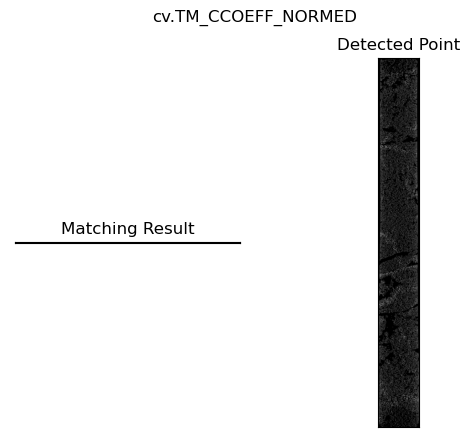

In [15]:
#This script matches jpgs from the atl_jpg and chirop_jpg folders.
#The width of the chiroptera lidar is about 490 meters.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

b1 = 4 
b2 = b1 + 4

atl_path = f'../make_image/atl_jpg_resized/atl_{b1}_{b2}.jpg'
chirop_path = f'../make_image/chirop_jpg/chirop_{b1}_{b2}.jpg'

img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

meth = 'cv.TM_CCOEFF_NORMED'

method = eval(meth)

# Apply template matching
res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
print(f'tl: {top_left} br: {bottom_right}')

img2 = cv.flip(img, -1)
plt.subplot(121)
plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img2,cmap = 'gray')
cv.rectangle(img2, top_left, bottom_right, 255, 20)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()


(4256, 475)
(4256, 6)
(1, 470)


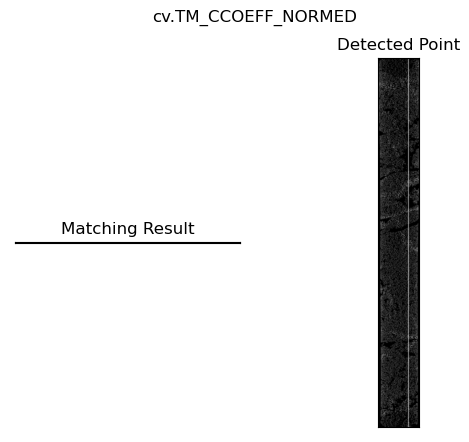

In [34]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

b1 = 20
b2 = b1 + 4

atl_path = f'../make_image/atl_jpg_resized/atl_{b1}_{b2}.jpg'
chirop_path = f'../make_image/chirop_jpg/chirop_{b1}_{b2}.jpg'

img = cv.imread(chirop_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread(atl_path, cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
# methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
#  'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

meth = 'cv.TM_CCOEFF_NORMED'

# Apply template Matching
print(img.shape)
print(template.shape)
res = cv.matchTemplate(img,template,eval(meth))
print(res.shape)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()